In [1]:
import pandas as pd
import seaborn as sns

data_lme = pd.read_csv("lme.csv", thousands=",", decimal=".")

data_lme.head()


,Date,Product,Currency,Value
0,21 October 2019,LME Aluminium,US$,1735.5
1,21 October 2019,LME Copper,US$,5820.0
2,21 October 2019,LME Zinc,US$,2500.0
3,21 October 2019,LME Nickel,US$,16200.0
4,21 October 2019,LME Lead,US$,2202.0


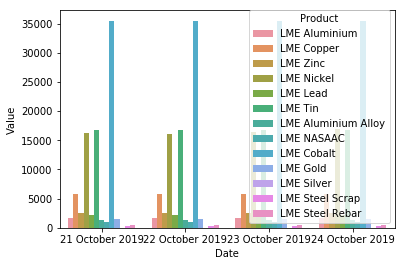

In [11]:
sns.barplot(x="Date", y="Value", hue="Product", data=data_lme)